### 🧠 Deep Learning Project (Adult Income Dataset)

#### 📌 Dataset
**Adult Income dataset** (also known as the Census Income dataset).  
> to predict whether a person earns **more than $50K/year** based on demographic and employment attributes.

---


In [ ]:
# Using OpenML via scikit-learn
from sklearn.datasets import fetch_openml
import pandas as pd

# Load dataset from OpenML
adult = fetch_openml(name="adult", version=2, as_frame=True)
df = adult.frame

print(df.head())
print(df.shape)  # (48842, 15)

   age  workclass  fnlwgt     education  education-num      marital-status  \
0   25    Private  226802          11th              7       Never-married   
1   38    Private   89814       HS-grad              9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm             12  Married-civ-spouse   
3   44    Private  160323  Some-college             10  Married-civ-spouse   
4   18        NaN  103497  Some-college             10       Never-married   

          occupation relationship   race     sex  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                NaN    Own-child  White  Female             0             0   

   hours-per-week native-country  class  
0       

Handling Duplicate Entries:

In [2]:
# Checking Duplicates
print('No. of duplicated rows =', df.duplicated().sum())
df.drop_duplicates(inplace=True)
print('No. of rows after filtering Duplicates =', df.shape[0])

No. of duplicated rows = 52
No. of rows after filtering Duplicates = 48790


Handling Missing Values:

In [3]:
# Checking Null Values
print(f'Null values per feature:\n{df.isnull().sum()}')

missing = ['workclass', 'occupation', 'native-country']
for col in missing:
    df[col] = df[col].cat.add_categories('missing').fillna('missing')

print('Total nulls after Handling =', df.isnull().sum().sum())

Null values per feature:
age                  0
workclass         2795
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2805
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     856
class                0
dtype: int64
Total nulls after Handling = 0


Checking Categorical Columns:

In [4]:
df.dtypes

age                  int64
workclass         category
fnlwgt               int64
education         category
education-num        int64
marital-status    category
occupation        category
relationship      category
race              category
sex               category
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country    category
class             category
dtype: object

In [5]:
categoricals = df.select_dtypes(['category']).columns
for col in categoricals:
    print(df[col].value_counts())
    print(f'{col}= {df[col].nunique()}')
    print()

workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
missing              2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
workclass= 9

education
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: count, dtype: int64
education= 16

marital-status
Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: count, dtype: int64
marital-status= 7

occupation
Prof-specialty       6165

In [6]:
# Handling Binary Mapping
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})
df['class'] = (df['class'] == '>50K').astype(int)

Checking Numerical Columns:

In [7]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,class
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886,0.239414
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729,0.426730
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


> `fnlwgt` - upon searching for context it was found that "Final weight" is nothing but a statistical weight representing how many people in the population this row represents, which carries no predictive power and might introduce bais so it will be dropped.

> `education-num` - represents education level, which introduces redundancy with the categorical column `education`, Hence only `education-num` will be kept for embedding since it does not require label encoding (will embedd to avoid any linear assumptions by the model, since the scale between levels is not consistent)

In [8]:
# Checking that the mapping perfectly aligns with actual order
df[['education', 'education-num']].drop_duplicates().sort_values('education-num')

,education,education-num
779,Preschool,1
323,1st-4th,2
37,5th-6th,3
9,7th-8th,4
54,9th,5
5,10th,6
0,11th,7
173,12th,8
1,HS-grad,9
3,Some-college,10


In [9]:
df.drop(columns=['fnlwgt', 'education'], inplace=True)

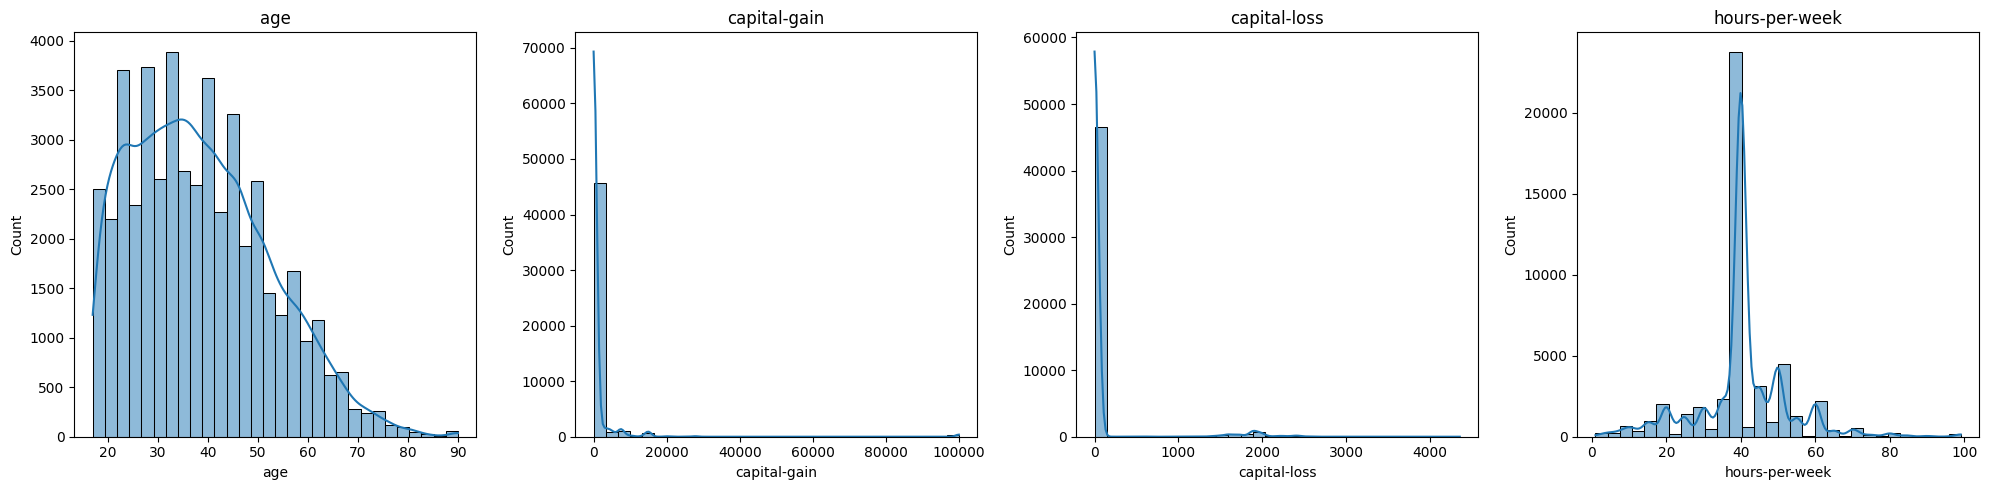

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

numericals = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, col in enumerate(numericals):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

Splitting:

In [11]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop(columns="class")
y = df["class"]

# Train - Validation - Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.15, random_state=42)

In [12]:
# Handling Embedding Features Separately
from sklearn.preprocessing import OrdinalEncoder

embedding_features = ['workclass', 'occupation', 'native-country', 'education-num']
other_features = [col for col in X.columns if col not in embedding_features]

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
encoder.fit(X_train[embedding_features])

X_train_embed = encoder.transform(X_train[embedding_features])
X_val_embed = encoder.transform(X_val[embedding_features])
X_test_embed = encoder.transform(X_test[embedding_features])

preprocessing object (for other features):

In [14]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler

to_one_hot = ['marital-status', 'relationship', 'race']
to_clip = ['hours-per-week']
to_log_transform = ['capital-gain', 'capital-loss']
to_scale = ['age']

clipper_transformer = Pipeline([
    ('clipper', FunctionTransformer(lambda x: np.clip(x, a_min=None, a_max=60))),
    ('scaler', StandardScaler())
])

log_transformer = Pipeline([
    ('log', FunctionTransformer(np.log1p)),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), to_one_hot),
        ('clip', clipper_transformer, to_clip),
        ('log', log_transformer, to_log_transform),
        ('scale', StandardScaler(), to_scale)
    ],
    remainder= 'passthrough'
)

X_train_prep = preprocessor.fit_transform(X_train[other_features])
X_val_prep   = preprocessor.transform(X_val[other_features])
X_test_prep  = preprocessor.transform(X_test[other_features])

> Will use `Model` instead of `Sequential`, because the input will be merged (embedding features + other features)

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate, Dropout

main_input = Input(shape=(X_train_prep.shape[1],), name='main_data')   # shape (20,)

# EMBEDDING features
workclass_input = Input(shape=(1,), name='workclass')
occupation_input = Input(shape=(1,), name='occupation')
country_input = Input(shape=(1,), name='native-country')
education_input = Input(shape=(1,), name='education-num')

# Calculating Variable Sizes
workclass_vsize = len(encoder.categories_[0]) +1  # +1 for unseen values
occupation_vsize = len(encoder.categories_[1]) +1 
country_vsize = len(encoder.categories_[2]) +1 
education_vsize = len(encoder.categories_[3])

print(f"Vocabulary sizes - Workclass: {workclass_vsize}, Occupation: {occupation_vsize}, Country: {country_vsize}, Education: {education_vsize}")

# EMBEDDING layers
workclass_embed = Embedding(input_dim=workclass_vsize, output_dim=4, name='workclass_embed')(workclass_input)
occupation_embed = Embedding(input_dim=occupation_vsize, output_dim=6, name='occupation_embed')(occupation_input)
country_embed = Embedding(input_dim=country_vsize, output_dim=8, name='country_embed')(country_input)
education_embed = Embedding(input_dim=education_vsize, output_dim=6, name='education_embed')(education_input)

# Flattening layers
workclass_flat = Flatten()(workclass_embed)    # shape: (batch_size, dim)
occupation_flat = Flatten()(occupation_embed)
country_flat = Flatten()(country_embed)
education_flat = Flatten()(education_embed)

# Concatinating everything:
concat = Concatenate()([
    main_input,        # 20 dimensions
    workclass_flat,    # 4 dimensions  
    occupation_flat,   # 6 dimensions
    country_flat,       # 8 dimensions
    education_flat     # 6 dimensions
]) 

dense1 = Dense(128, activation='relu')(concat)
dropout1 = Dropout(0.3)(dense1)

dense2 = Dense(64, activation='relu')(dropout1)
dropout2 = Dropout(0.3)(dense2)

dense3 = Dense(32, activation='relu')(dropout2)

output = Dense(1, activation='sigmoid')(dense3)

# Creating the model
model = Model(
    inputs=[main_input, workclass_input, occupation_input, country_input, education_input],
    outputs=output
)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Vocabulary sizes - Workclass: 10, Occupation: 16, Country: 43, Education: 16


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ workclass           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ occupation          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ native-country      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ education-num       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ workclass_embed     │ (None, 1, 4)      │         40 │ workclass[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ occupation_embed    │ (None, 1, 6)      │         96 │ occupation[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ country_embed       │ (None, 1, 8)      │        344 │ native-country[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ education_embed     │ (None, 1, 6)      │         96 │ education-num[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ main_data           │ (None, 20)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 4)         │          0 │ workclass_embed[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 6)         │          0 │ occupation_embed… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 8)         │          0 │ country_embed[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 6)         │          0 │ education_embed[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 44)        │          0 │ main_data[0][0],  │
│ (Concatenate)       │                   │            │ flatten[0][0],    │
│                     │                   │            │ flatten_1[0][0],  │
│                     │                   │            │ flatten_2[0][0],  │
│                     │                   │            │ flatten_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │      5,760 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 16,705 (65.25 KB)

 Trainable params: 16,705 (65.25 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Preparing training data
train_data = {
    'main_data': X_train_prep,           
    'workclass': X_train_embed[:, 0],    
    'occupation': X_train_embed[:, 1],    
    'native-country': X_train_embed[:, 2],
    'education-num': X_train_embed[:, 3]
}

# Preparing validation data
val_data = {
    'main_data': X_val_prep,
    'workclass': X_val_embed[:, 0],
    'occupation': X_val_embed[:, 1], 
    'native-country': X_val_embed[:, 2],
    'education-num': X_val_embed[:, 3]
}

# Preparing Test Data
test_data = {
    'main_data': X_test_prep,
    'workclass': X_test_embed[:, 0],
    'occupation': X_test_embed[:, 1],
    'native-country': X_test_embed[:, 2],
    'education-num': X_test_embed[:, 3]
}

In [20]:
# Train the model
history = model.fit(
    train_data, y_train,
    validation_data=(val_data, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8351 - loss: 0.3528 - val_accuracy: 0.8459 - val_loss: 0.3295
Epoch 2/50
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8478 - loss: 0.3253 - val_accuracy: 0.8495 - val_loss: 0.3291
Epoch 3/50
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8499 - loss: 0.3226 - val_accuracy: 0.8494 - val_loss: 0.3267
Epoch 4/50
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8514 - loss: 0.3208 - val_accuracy: 0.8528 - val_loss: 0.3225
Epoch 5/50
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8529 - loss: 0.3180 - val_accuracy: 0.8524 - val_loss: 0.3214
Epoch 6/50
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8537 - loss: 0.3145 - val_accuracy: 0.8526 - val_loss: 0.3207
Epoch 7/50
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8559 - loss: 0.3121 - val_accuracy: 0.8564 - val_loss: 0.3197
Epoch 8/50
1068/1068 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8550 - loss: 0.3106 - 

In [21]:
# Final Evaluation on test set
test_loss, test_accuracy = model.evaluate(test_data, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Making predictions
predictions = model.predict(test_data)

69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8629 - loss: 0.3150
Test Accuracy: 0.8629
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


=== VALIDATION SET EVALUATION ===
Validation Loss: 0.3294
Validation Accuracy: 0.8557

=== TEST SET EVALUATION ===
Test Loss: 0.3150
Test Accuracy: 0.8629

=== COMPARATIVE ANALYSIS ===
Accuracy Difference: 0.0072
Loss Difference: 0.0143
✅ Model generalizes well (similar performance on val and test)
389/389 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

=== DETAILED VALIDATION SET METRICS ===
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      9423
           1       0.74      0.62      0.68      3018

    accuracy                           0.86     12441
   macro avg       0.81      0.78      0.79     12441
weighted avg       0.85      0.86      0.85     12441

Validation ROC-AUC: 0.9066

=== DETAILED TEST SET METRICS ===
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1671
           1       0.75      0.64      0.69       525

    accuracy              

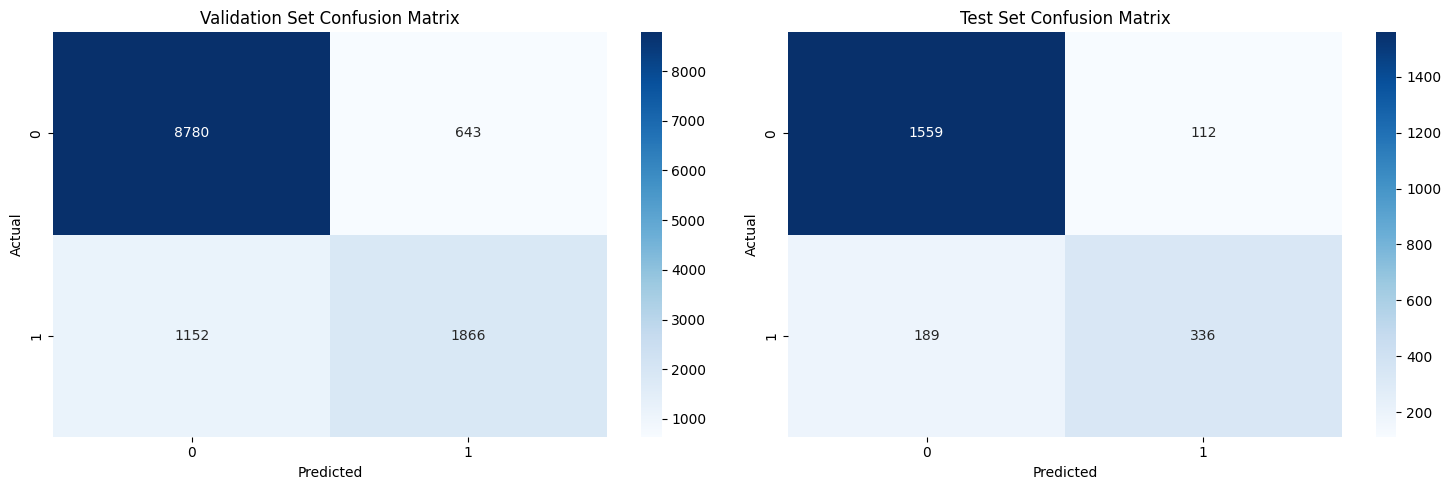

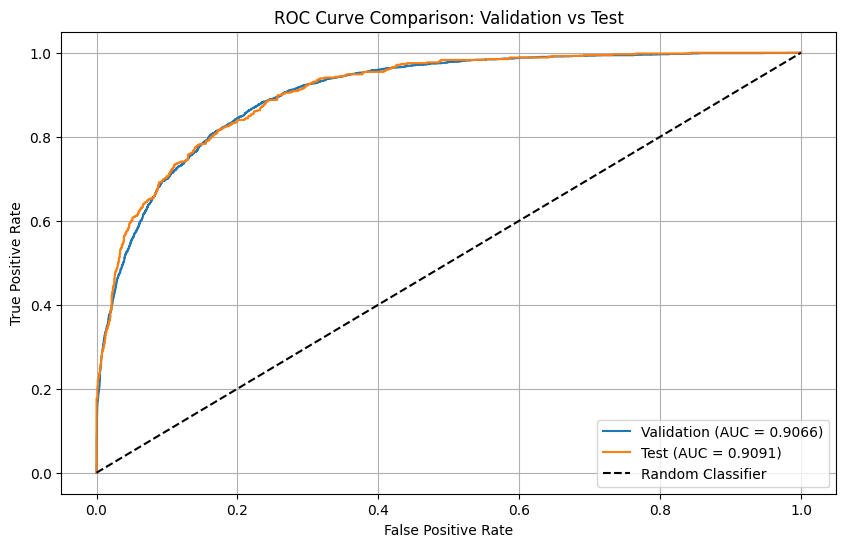


=== CLASS-WISE PERFORMANCE ===
Validation - Class 0 accuracy: 0.9318
Validation - Class 1 accuracy: 0.6183
Test - Class 0 accuracy: 0.9330
Test - Class 1 accuracy: 0.6400

=== FINAL SUMMARY ===
🎉 Excellent generalization! Model performs similarly on val and test sets.

Key Metrics:
- Validation Accuracy: 0.8557
- Test Accuracy: 0.8629
- Performance Gap: 0.0072
- Validation ROC-AUC: 0.9066
- Test ROC-AUC: 0.9091


In [22]:
# Evaluate on validation set
val_loss, val_accuracy = model.evaluate(val_data, y_val, verbose=0)
print("=== VALIDATION SET EVALUATION ===")
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(test_data, y_test, verbose=0)
print("\n=== TEST SET EVALUATION ===")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Comparative analysis
print("\n=== COMPARATIVE ANALYSIS ===")
print(f"Accuracy Difference: {abs(val_accuracy - test_accuracy):.4f}")
print(f"Loss Difference: {abs(val_loss - test_loss):.4f}")

# Performance interpretation
if abs(val_accuracy - test_accuracy) < 0.02:
    print("✅ Model generalizes well (similar performance on val and test)")
elif abs(val_accuracy - test_accuracy) < 0.05:
    print("⚠️  Moderate generalization gap")
else:
    print("❌ Large generalization gap - potential overfitting")

# Detailed metrics comparison
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import numpy as np

# Validation set predictions
val_predictions = model.predict(val_data)
val_pred_binary = (val_predictions > 0.5).astype(int)

# Test set predictions
test_predictions = model.predict(test_data)
test_pred_binary = (test_predictions > 0.5).astype(int)

print("\n=== DETAILED VALIDATION SET METRICS ===")
print(classification_report(y_val, val_pred_binary))
print(f"Validation ROC-AUC: {roc_auc_score(y_val, val_predictions):.4f}")

print("\n=== DETAILED TEST SET METRICS ===")
print(classification_report(y_test, test_pred_binary))
print(f"Test ROC-AUC: {roc_auc_score(y_test, test_predictions):.4f}")

# Confusion matrices comparison
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Validation confusion matrix
cm_val = confusion_matrix(y_val, val_pred_binary)
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Validation Set Confusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# Test confusion matrix
cm_test = confusion_matrix(y_test, test_pred_binary)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_title('Test Set Confusion Matrix')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.tight_layout()
plt.show()

# ROC Curve comparison
from sklearn.metrics import roc_curve

fpr_val, tpr_val, _ = roc_curve(y_val, val_predictions)
fpr_test, tpr_test, _ = roc_curve(y_test, test_predictions)

plt.figure(figsize=(10, 6))
plt.plot(fpr_val, tpr_val, label=f'Validation (AUC = {roc_auc_score(y_val, val_predictions):.4f})')
plt.plot(fpr_test, tpr_test, label=f'Test (AUC = {roc_auc_score(y_test, test_predictions):.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Validation vs Test')
plt.legend()
plt.grid(True)
plt.show()

# Performance by class (if binary classification)
print("\n=== CLASS-WISE PERFORMANCE ===")
def class_performance(y_true, y_pred, set_name):
    unique_classes = np.unique(y_true)
    for cls in unique_classes:
        cls_indices = y_true == cls
        cls_accuracy = np.mean(y_pred[cls_indices] == y_true[cls_indices])
        print(f"{set_name} - Class {cls} accuracy: {cls_accuracy:.4f}")

class_performance(y_val.values, val_pred_binary.flatten(), "Validation")
class_performance(y_test.values, test_pred_binary.flatten(), "Test")

# Final summary
print("\n=== FINAL SUMMARY ===")
performance_gap = abs(val_accuracy - test_accuracy)
if performance_gap < 0.01:
    print("🎉 Excellent generalization! Model performs similarly on val and test sets.")
elif performance_gap < 0.03:
    print("👍 Good generalization. Minor performance difference acceptable.")
elif performance_gap < 0.05:
    print("⚠️  Moderate generalization gap. Consider regularization techniques.")
else:
    print("🔴 Significant generalization gap. Model may be overfitting.")

print(f"\nKey Metrics:")
print(f"- Validation Accuracy: {val_accuracy:.4f}")
print(f"- Test Accuracy: {test_accuracy:.4f}")
print(f"- Performance Gap: {performance_gap:.4f}")
print(f"- Validation ROC-AUC: {roc_auc_score(y_val, val_predictions):.4f}")
print(f"- Test ROC-AUC: {roc_auc_score(y_test, test_predictions):.4f}")

In [ ]:
# Saving Model
model.save('income_classifier.keras')